In [9]:
import boto3
from IPython.display import Image, display
from trp import Document
from PIL import Image as PImage, ImageDraw
import time
from IPython.display import IFrame

# In this section, we will deep dive into Amazon Textract APIs and its feature. 
Amazon Textract includes simple, easy-to-use APIs that can analyze image files and PDF files.
Amazon Textract APIs can be classified into synchronous APIs for real time processing and asynchronous APIs for batch processing.
We will deep dive into each:
•	Synchronous APIs(Real time processing use case)
•	Asynchronous APIs(Batch processing use cases)
Synchronous APIs (Real time processing use case): There are two APIs which can help with real time analysis:
                         Analyze Text 
                         Analyze Document API


In [10]:
# Curent AWS Region. Use this to choose corresponding S3 bucket with sample content

mySession = boto3.session.Session()
awsRegion = mySession.region_name

In [28]:
# S3 bucket that contains sample documents. Download the sample documents and craete an Amazon s3 Bucket and upload these documents

s3BucketName = "<your amaozn s3 bucket>"

In [29]:
# Amazon S3 client
s3 = boto3.client('s3')

# Amazon Textract client
textract = boto3.client('textract')

In [30]:
# 1. Detect text from image with

https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html

In [13]:
# Document
documentName = "sample-invoice.png"

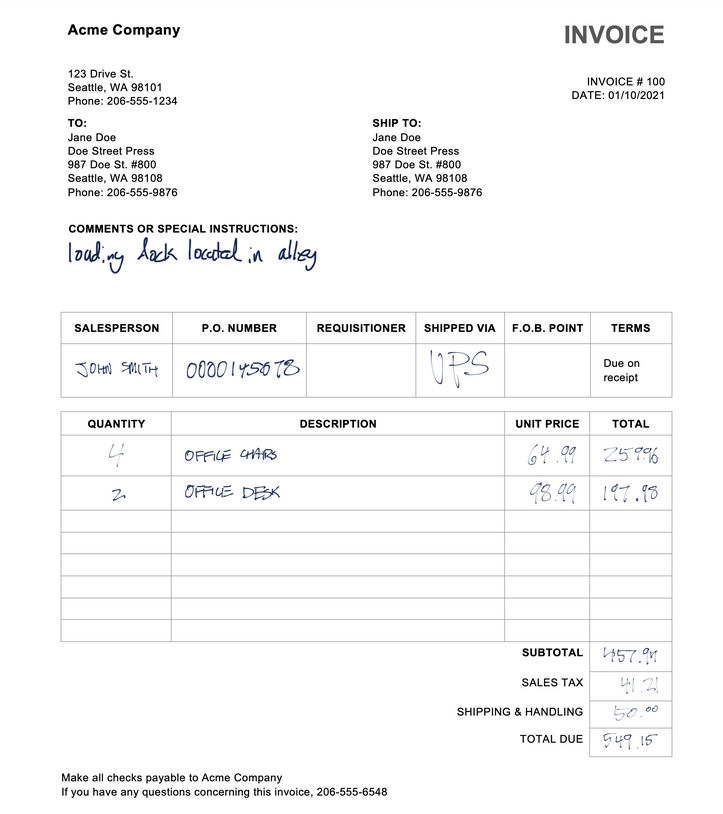

In [14]:
display(Image(filename=documentName))

In [15]:
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})


Acme Company
INVOICE
123 Drive St.
Seattle, WA 98101
INVOICE # 100
Phone: 206-555-1234
DATE: 01/10/2021
TO:
SHIP TO:
Jane Doe
Jane Doe
Doe Street Press
Doe Street Press
987 Doe St. #800
987 Doe St. #800
Seattle, WA 98108
Seattle, WA 98108
Phone: 206-555-9876
Phone: 206-555-9876
COMMENTS OR SPECIAL INSTRUCTIONS:
loading lack locatal in alley
SALESPERSON
P.O. NUMBER
REQUISITIONER
SHIPPED VIA
F.O.B. POINT
TERMS
John SMITH
0000145678
UPS
Due on
receipt
QUANTITY
DESCRIPTION
UNIT PRICE
TOTAL
4
OFFILE GARS
64.99
25996
2
OFFICE DESX
98.99
197.98
SUBTOTAL
457.9n
SALES TAX
41.21
SHIPPING & HANDLING
50.00
TOTAL DUE
549.15
Make all checks payable to Acme Company
If you have any questions concerning this invoice, 206-555-6548


In [16]:
print(response)

{'DocumentMetadata': {'Pages': 1}, 'Blocks': [{'BlockType': 'PAGE', 'Geometry': {'BoundingBox': {'Width': 0.9993084073066711, 'Height': 1.0, 'Left': 0.0, 'Top': 0.0}, 'Polygon': [{'X': 0.0, 'Y': 0.0}, {'X': 0.9993084073066711, 'Y': 1.0877390644358832e-16}, {'X': 0.9993084073066711, 'Y': 1.0}, {'X': 0.0, 'Y': 1.0}]}, 'Id': '288cb8aa-91c6-41bf-91c6-23bebc61cb9c', 'Relationships': [{'Type': 'CHILD', 'Ids': ['1545ecdc-04da-48c1-a092-ef3728bcd4c3', '545ccec6-78d4-4991-8f60-7d42dc814fa3', '55568874-0e88-4467-ab0a-92d64596ea31', '65ac25dc-1b3a-4d81-8c38-edf6f8c90a6f', 'd64e628b-d169-4efd-b9bc-d559231cc33a', 'f4bfa9f6-6408-4f17-9211-fd0a1935eb25', 'a0fa624b-0409-4d30-bb09-c97fb3603c53', '34d378db-44e4-4db3-8f78-a56d49eb6f49', '32083b5c-0c6e-4735-8aeb-642bb5f6c8a4', '0495f366-6ff3-4a0d-9304-560ec9b75f0c', '235165e6-edbc-4be8-961d-ed077df88bdc', '46ebf1bb-1ccb-475a-9d93-6d22c0f647cf', 'b7c81234-b7b9-4251-a00b-935c5beb06f5', 'c3cccb2a-7d55-4fca-aa7c-dc866aa419d0', '495b9f85-415b-4592-89e8-e99a7ca

In [17]:

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

Acme Company
INVOICE
123 Drive St.
Seattle, WA 98101
INVOICE # 100
Phone: 206-555-1234
DATE: 01/10/2021
TO:
SHIP TO:
Jane Doe
Jane Doe
Doe Street Press
Doe Street Press
987 Doe St. #800
987 Doe St. #800
Seattle, WA 98108
Seattle, WA 98108
Phone: 206-555-9876
Phone: 206-555-9876
COMMENTS OR SPECIAL INSTRUCTIONS:
loading lack locatal in alley
SALESPERSON
P.O. NUMBER
REQUISITIONER
SHIPPED VIA
F.O.B. POINT
TERMS
John SMITH
0000145678
UPS
Due on
receipt
QUANTITY
DESCRIPTION
UNIT PRICE
TOTAL
4
OFFILE GARS
64.99
25996
2
OFFICE DESX
98.99
197.98
SUBTOTAL
457.9n
SALES TAX
41.21
SHIPPING & HANDLING
50.00
TOTAL DUE
549.15
Make all checks payable to Acme Company
If you have any questions concerning this invoice, 206-555-6548


# 2. Detect text from S3 object

https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html

## Lines and Words of Text - JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/API_BoundingBox.html

https://docs.aws.amazon.com/textract/latest/dg/text-location.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-lines-words.html

In [22]:
#  Reading order

In [23]:
# Document
documentName = "two-column-image.jpg"

In [19]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [24]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

print(response)

{'DocumentMetadata': {'Pages': 1}, 'Blocks': [{'BlockType': 'PAGE', 'Geometry': {'BoundingBox': {'Width': 0.8739743232727051, 'Height': 0.8769469857215881, 'Left': 0.07159461826086044, 'Top': 0.05003209412097931}, 'Polygon': [{'X': 0.07336952537298203, 'Y': 0.0508636012673378}, {'X': 0.9428942203521729, 'Y': 0.05003209412097931}, {'X': 0.9455689787864685, 'Y': 0.923485517501831}, {'X': 0.07159461826086044, 'Y': 0.9269790649414062}]}, 'Id': '98406f2f-fd14-4fe8-8a19-f4ca22d2a66a', 'Relationships': [{'Type': 'CHILD', 'Ids': ['57698fc9-8f59-44e4-8191-5f4f5f3f0028', 'c76119ef-32a2-4b5f-8a6a-3389d082cf95', '963414b4-bb20-4a20-b68c-7927b409f719', '5ce78119-cad5-49b4-8215-7abcdaed112c', 'dc846d17-b29d-433f-9e9a-472de6879202', '5c63869c-269c-4ea6-a708-a0aedb0a0e3d', '455db78f-dc9b-4f3c-962f-b139909dc73a', '9902a972-6a51-469e-885c-c6aac315c273', 'e40e18a1-3fae-4d90-b19c-8baa90a42257', '072d3be2-1338-4b24-ba36-5f8335c76475', '2bdecfc9-cb33-4c0e-bcfd-11db52dc2dc0', 'b5e22330-50fa-4101-a4cc-c99bc06

In [25]:


# Detect columns and print lines
columns = []
lines = []
for item in response["Blocks"]:
      if item["BlockType"] == "LINE":
        column_found=False
        for index, column in enumerate(columns):
            bbox_left = item["Geometry"]["BoundingBox"]["Left"]
            bbox_right = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]
            bbox_centre = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]/2
            column_centre = column['left'] + column['right']/2

            if (bbox_centre > column['left'] and bbox_centre < column['right']) or (column_centre > bbox_left and column_centre < bbox_right):
                #Bbox appears inside the column
                lines.append([index, item["Text"]])
                column_found=True
                break
        if not column_found:
            columns.append({'left':item["Geometry"]["BoundingBox"]["Left"], 'right':item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]})
            lines.append([len(columns)-1, item["Text"]])

lines.sort(key=lambda x: x[0])
for line in lines:
    print (line[1])

Extract data quickly &
accurately
Textract makes it easy to quickly and
accurately extract data from
documents and forms. Textract
automatically detects a document's
layout and the key elements on the
page, understands the data
relationships in any embedded forms
or tables, and extracts everything
with its context intact. This means
you can instantly use the extracted
data in an application or store it in a
database without a lot of
complicated code in between
No code or templates to
maintain
Textract's pre-trained machine
learning models eliminate the need
to write code for data extraction,
because they have already been
trained on tens of millions of
documents from virtually every
industry, including invoices, receipts,
contracts, tax documents, sales
orders, enrollment forms, benefit
applications, insurance claims, policy
documents and many more. You no
longer need to maintain code for
every document or form you might
receive or worry about how page
layouts change over time.


# Analyze Document API for tables and Forms: Key/Values

https://docs.aws.amazon.com/textract/latest/dg/API_AnalyzeDocument.html

In [42]:
# Document
documentName = "sample-invoice.png"
# Document


In [43]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [44]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    },
    FeatureTypes=["FORMS","TABLES"])

In [45]:


#print(response)

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Get field by key
    print("\nGet Field by Key:")
    key = "Phone Number:"
    field = page.form.getFieldByKey(key)
    if(field):
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Search fields by key
    print("\nSearch Fields:")
    key = "address"
    fields = page.form.searchFieldsByKey(key)
    for field in fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

Fields:
Key: Phone:, Value: 206-555-1234
Key: Phone:, Value: None
Key: Phone:, Value: None
Key: COMMENTS OR SPECIAL INSTRUCTIONS:, Value: loading lack locatal in alley
Key: SALES TAX, Value: 41.21
Key: SHIPPING & HANDLING, Value: 50.00
Key: REQUISITIONER, Value: None
Key: SUBTOTAL, Value: 457.9n
Key: TOTAL DUE, Value: 549.15
Key: SALESPERSON, Value: John SMITH
Key: SHIP TO:, Value: Jane Doe Doe Street Press 987 Doe St. #800 Seattle, WA 98108 206-555-9876
Key: P.O. NUMBER, Value: 0000145678
Key: TO:, Value: Jane Doe Doe Street Press 987 Doe St. #800 Seattle, WA 98108 206-555-9876
Key: DATE:, Value: 01/10/2021

Get Field by Key:

Search Fields:


In [46]:
doc = Document(response)

for page in doc.pages:
     # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))

Table[0][0] = QUANTITY 
Table[0][1] = DESCRIPTION 
Table[0][2] = UNIT PRICE 
Table[0][3] = TOTAL 
Table[1][0] = 4 
Table[1][1] = OFFILE GARS 
Table[1][2] = 64.99 
Table[1][3] = 25996 
Table[2][0] = 2 
Table[2][1] = OFFICE DESX 
Table[2][2] = 98.99 
Table[2][3] = 197.98 
Table[3][0] = 
Table[3][1] = 
Table[3][2] = 
Table[3][3] = 
Table[4][0] = 
Table[4][1] = 
Table[4][2] = 
Table[4][3] = 
Table[5][0] = 
Table[5][1] = 
Table[5][2] = 
Table[5][3] = 
Table[6][0] = 
Table[6][1] = 
Table[6][2] = 
Table[6][3] = 
Table[7][0] = 
Table[7][1] = 
Table[7][2] = 
Table[7][3] = 
Table[8][0] = 
Table[8][1] = 
Table[8][2] = 
Table[8][3] = 
Table[9][0] = 
Table[9][1] = 
Table[9][2] = SUBTOTAL 
Table[9][3] = 457.9n 
Table[10][0] = 
Table[10][1] = 
Table[10][2] = SALES TAX 
Table[10][3] = 41.21 
Table[11][0] = 
Table[11][1] = SHIPPING 
Table[11][2] = & HANDLING 
Table[11][3] = 50.00 
Table[12][0] = 
Table[12][1] = 
Table[12][2] = TOTAL DUE 
Table[12][3] = 549.15 
Table[0][0] = SALESPERSON 
Table[0][1] = P

# 12. PDF Processing

https://docs.aws.amazon.com/textract/latest/dg/API_StartDocumentTextDetection.html
https://docs.aws.amazon.com/textract/latest/dg/API_GetDocumentTextDetection.html
https://docs.aws.amazon.com/textract/latest/dg/API_StartDocumentAnalysis.html
https://docs.aws.amazon.com/textract/latest/dg/API_GetDocumentAnalysis.html

In [47]:
def startJob(s3BucketName, objectName):
    response = None
    response = textract.start_document_text_detection(
    DocumentLocation={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': objectName
        }
    })

    return response["JobId"]

def isJobComplete(jobId):
    response = textract.get_document_text_detection(JobId=jobId)
    status = response["JobStatus"]
    print("Job status: {}".format(status))

    while(status == "IN_PROGRESS"):
        time.sleep(5)
        response = textract.get_document_text_detection(JobId=jobId)
        status = response["JobStatus"]
        print("Job status: {}".format(status))

    return status

def getJobResults(jobId):

    pages = []
    response = textract.get_document_text_detection(JobId=jobId)
    
    pages.append(response)
    print("Resultset page recieved: {}".format(len(pages)))
    nextToken = None
    if('NextToken' in response):
        nextToken = response['NextToken']

    while(nextToken):
        response = textract.get_document_text_detection(JobId=jobId, NextToken=nextToken)

        pages.append(response)
        print("Resultset page recieved: {}".format(len(pages)))
        nextToken = None
        if('NextToken' in response):
            nextToken = response['NextToken']

    return pages

In [48]:
# Document
documentName = "job-application-form.pdf"

In [50]:
jobId = startJob(s3BucketName, documentName)
print("Started job with id: {}".format(jobId))
if(isJobComplete(jobId)):
    response = getJobResults(jobId)

#print(response)

# Print detected text
for resultPage in response:
    for item in resultPage["Blocks"]:
        if item["BlockType"] == "LINE":
            print ('\033[94m' +  item["Text"] + '\033[0m')

Started job with id: 70bfef6d9fdd4abea03ca4ba5f45d49f36752589a374e2332857d22ef2ae30ad
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Jo